# Crime incidents in San Francisco and Seatle

# San Francisco ...

Some introductory text

In [79]:
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
#import sklearn
import time
import csv
import urllib2
import requests
import dateutil.parser
from dateutil.parser import parse
from datetime import datetime

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import colorConverter

import brewer2mpl
import prettyplotlib as ppl
import seaborn as sns
from pandas.tools.plotting import scatter_matrix,radviz

import gc
gc.enable()

pd.set_option('display.max_rows', 36)
pd.set_option('display.max_columns', 200)

Read and print the source data ...

In [19]:
url_sf     = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv"
url_seatle = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv"
csv_sf     = "sanfrancisco_incidents_summer_2014.csv"   # local file
csv_seatle = "seattle_incidents_summer_2014.csv"        # local file

In [65]:
f = urllib2.urlopen(url_sf,'rb')
reader = csv.reader(f, delimiter=',', quotechar='"')
"""
with open(csv_sf,'rt') as f:
    #reader = csv.reader(f, delimiter=',', quotechar='"')
    reader = csv.DictReader(f, delimiter=',', quotechar='"')
    #for row in reader:
    #    print "%10d %14s %45s   %10s %5s %s" % \
    #        (int(row["IncidntNum"]),row['Category'], row['Descript'], row["Date"], row["Time"], row["PdId"]) # tuple(row["Location"]
"""

'\nwith open(csv_sf,\'rt\') as f:\n    #reader = csv.reader(f, delimiter=\',\', quotechar=\'"\')\n    reader = csv.DictReader(f, delimiter=\',\', quotechar=\'"\')\n    #for row in reader:\n    #    print "%10d %14s %45s   %10s %5s %s" %     #        (int(row["IncidntNum"]),row[\'Category\'], row[\'Descript\'], row["Date"], row["Time"], row["PdId"]) # tuple(row["Location"]\n'

In [62]:
#with open(csv_seatle, 'rb') as f:
f = urllib2.urlopen(url_seatle,'rb')
reader = csv.reader(f, delimiter=',', quotechar='\"')
#reader = csv.DictReader(f, delimiter=',', quotechar='\"')
count = 0
wrap = "[]"
for row in reader:
    if count > 6:
        break
    elif count > 0:
        #print ' '.join(row)  # csv.reader   # # %.3f %.3f 
        ### rows = list(csv.reader(f))       # each row: ["s1","s2",..."s_ncols"]
        ### print rows[row_number][column_number]
        print "%6d %10d %5d %3d %25s %6d %15s %22s %3s %3s  %2d %4d " % \
            (int(row[0]),int(row[1]),int(row[2]),int(row[3]), row[4], int(row[5]), row[6],row[7] \
            ,row[11],row[12], int(row[17]),int(row[18])) #  float(row[14]),float(row[15]): X,Y row[8],row[9],row[10],  row[13],row[17],
    count += 1

483839 2015218538  2202   0        BURGLARY-FORCE-RES   2200        BURGLARY 06/28/2015 10:31:00 AM   J  J2   6 2014 
481252 2015213067  2610   0      FRAUD-IDENTITY THEFT   2600           FRAUD 06/24/2015 11:09:00 AM   C  C2   6 2014 
481375 2015210301  2316   0                THEFT-MAIL   2300      MAIL THEFT 06/22/2015 09:22:00 AM   F  F3   8 2014 
481690 2015209327  2599   0               COUNTERFEIT   2500     COUNTERFEIT 06/21/2015 03:52:00 PM   M  M2   6 2014 
478198 2015207880  2399   3                 THEFT-OTH   2300  OTHER PROPERTY 06/20/2015 11:59:00 AM   J  J3   6 2014 
480485 2015904103  2308   0            THEFT-BUILDING   2300  OTHER PROPERTY 06/19/2015 02:55:00 PM   R  R3   6 2014 


In [6]:
#resp = requests.get(url_sf)
#resp.text

In [68]:
# read San Francisco and Seatle CSV data file from GitHub to a data frame sf
sf = pd.read_table(url_sf, sep=',', quotechar='\"', parse_dates=True) #, index_col='PdId')  # read_scv | read_table
seatle = pd.read_table(url_seatle, sep=',', quotechar='\"', parse_dates=False)  # read_scv | read_table
# options: header=None, skiprows=[], na_values=['NULL'], 

In [67]:
sf[15500:15502]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
15500,140587518,OTHER OFFENSES,PROBATION VIOLATION,Tuesday,07/15/2014,13:04,MISSION,"ARREST, BOOKED",2900 Block of 16TH ST,-122.419202,37.765024,"(37.7650244301204, -122.41920245941)",14058751826170
15501,146137193,NON-CRIMINAL,LOST PROPERTY,Tuesday,07/15/2014,13:00,CENTRAL,NONE,700 Block of VALLEJO ST,-122.409792,37.798508,"(37.7985083480435, -122.409791662293)",14613719371000


In [69]:
seatle[16000:16002]

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
16000,1024648,2014236503,2902,0,PROPERTY DAMAGE-RESIDENTIAL,2900,PROPERTY DAMAGE,07/19/2014 04:03:00 PM,07/19/2014 03:10:00 PM,NaN,1XX BLOCK OF MELROSE AV E,E,E1,7400.5003,-122.327854,47.619039,"(47.619038675, -122.32785379)",7,2014
16001,46092,2014236503,2902,0,PROPERTY DAMAGE-RESIDENTIAL,2900,PROPERTY DAMAGE,07/19/2014 04:03:00 PM,07/19/2014 03:10:00 PM,NaN,1XX BLOCK OF MELROSE AV E,E,E1,7402.1005,-122.327854,47.619039,"(47.619038674, -122.327853792)",7,2014


In [10]:
sf.Category.unique()

array(['ARSON', 'NON-CRIMINAL', 'LARCENY/THEFT', 'DRUG/NARCOTIC',
       'DRIVING UNDER THE INFLUENCE', 'OTHER OFFENSES', 'TRESPASS',
       'VEHICLE THEFT', 'ASSAULT', 'FRAUD', 'SUSPICIOUS OCC',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'WARRANTS',
       'ROBBERY', 'DRUNKENNESS', 'PROSTITUTION', 'LIQUOR LAWS',
       'KIDNAPPING', 'FAMILY OFFENSES', 'LOITERING', 'DISORDERLY CONDUCT',
       'FORGERY/COUNTERFEITING', 'EMBEZZLEMENT', 'BURGLARY', 'SUICIDE',
       'VANDALISM', 'STOLEN PROPERTY', 'RUNAWAY', 'GAMBLING', 'EXTORTION',
       'PORNOGRAPHY/OBSCENE MAT', 'BRIBERY'], dtype=object)

In [4]:
mask_narc = sf['Category'] == 'DRUG/NARCOTIC'
sf[mask_narc]['Category'].count()   #  1345 rows x 13 col | narc/sf.count() = 4.64%

1345

In [9]:
seatle['Offense Type'].unique()

array(['BURGLARY-FORCE-RES', 'FRAUD-IDENTITY THEFT', 'THEFT-MAIL',
       'COUNTERFEIT', 'THEFT-OTH', 'THEFT-BUILDING', 'FRAUD-CREDIT CARD',
       'FRAUD-CHECK', 'EMBEZZLE', 'BURGLARY-NOFORCE-NONRES', 'FRAUD-OTHER',
       'THEFT-CARPROWL', 'HARASSMENT', 'THEFT-AUTOACC',
       'BURGLARY-NOFORCE-RES', 'PROPERTY DAMAGE-NON RESIDENTIA',
       'THEFT-LICENSE PLATE', 'PROPERTY LOST', 'FORGERY-CHECK',
       'VEH-THEFT-AUTO', 'BURGLARY-SECURE PARKING-RES', 'THEFT-PKPOCKET',
       'THREATS-OTHER', 'PROPERTY LOST - POLICE EQUIPME', 'THEFT-BICYCLE',
       'VEH-RCVD-FOR OTHER AGENCY', 'VEH-THEFT-MTRCYCLE',
       'NARC-SELL-HEROIN', 'DISPUTE-CIVIL PROPERTY (NON AU',
       'VEH-THEFT-TRAILER', 'ASSLT-AGG-WEAPON', 'PROPERTY FOUND',
       'THREATS-KILL', 'DISPUTE-OTH', 'WARRARR-MISDEMEANOR',
       'ASSLT-AGG-BODYFORCE', 'PROPERTY DAMAGE-RESIDENTIAL',
       'VEH-THEFT-TRUCK', 'PROPERTY DAMAGE - GRAFFITI', 'THEFT-AUTO PARTS',
       'ASSLT-NONAGG', 'FRAUD-WIRE-ELECTRONIC', 'TRAFFIC',
       

## Data Pre-processing

The data were .... The code in in the Appendix A.

In [72]:
n_sf     = len(sf['Category'])            # 28993   type: numpy.int64
n_seatle = len(seatle['Offense Type'])    # 32779   type: numpy.int64

# Add column 'one' = 1 for different counting on groups later
sf['one']     = pd.Series(np.ones(n_sf,      dtype=np.int64), index=sf.index)
seatle['one'] = pd.Series(np.ones(n_seatle , dtype=np.int64), index=seatle.index)

In [73]:
#------------------ San Francisco ---------------------------------------------------
# Add column 'datetime' (date only without hh:mm:ss) and columns 'Year','Month','Day'. 
# This columns will be used for analysis and visuaisation by diffeerent periods.
n = n_sf

c_dt    = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)
c_year  = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)  # column: index,value
c_month = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)  # type: pandas.core.series.Series
c_day   = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)
c_hour  = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)
#c_minute= pd.Series(np.zeros(n, dtype=np.int64), index=sf.index)  # do not need

i = 0
for dt_str in zip(sf['Date'],sf['Time']):
    
    dt_full_str = dt_str[0] + ' ' + dt_str[1]   # ('2014-08-31', '23:50:00')
    dt          = parse(dt_full_str)            # from string to datetime
    #print "%2d %4d %2d %2d    %2d %2d %2d %s" % \
    #i,dt.year,dt.month,dt.day,dt.hour,dt.minute, dt.second, type(dt.year))# all - int 
    c_year[i]  = dt.year
    c_month[i] = dt.month
    c_day[i]   = dt.day
    c_hour[i]  = dt.hour
    c_dt[i]    = parse(dt_str[0])  # date only in datetime, no hh:mm:ss
    #c_minute[i]= dt.minute
    i += 1

sf['Year']  = c_year
sf['Month'] = c_month
sf['Day']   = c_day
sf['Hour']  = c_hour
sf['datetime'] = c_dt

for i in [0,15000,28000]:
    print sf['Year'][i],sf['Month'][i],sf['Day'][i],sf['Hour'][i],sf['datetime'][i]

2014 8 31 23 2014-08-31 00:00:00
2014 7 17 2 2014-07-17 00:00:00
2014 6 4 12 2014-06-04 00:00:00


In [75]:
#-------------------------------------------- Seattle ---------------------------------------------------
# Add column 'datetime' (date only without hh:mm:ss) and columns 'Year','Month','Day'. 
# This columns will be used for analysis and visuaisation by diffeerent periods.

n = n_seatle

cc_dt    = pd.Series(np.empty(n, dtype=np.int64), index=seatle.index)
cc_day   = pd.Series(np.empty(n, dtype=np.int64), index=seatle.index) # column: index,value
cc_hour  = pd.Series(np.empty(n, dtype=np.int64), index=seatle.index) # type: pandas.core.series.Series

i = 0
for dt_str in seatle['Occurred Date or Date Range Start']:
    
    dt_str = seatle['Occurred Date or Date Range Start'][i] # 06/28/2014 10:31:00 AM 
    dt = parse(dt_str)                                      # from string to datetime
    #print "%2d %4d %2d %2d    %2d %2d %2d " % \
    #    (i, dt.year,dt.month,dt.day, dt.hour,dt.minute, dt.second) # all - int 
    cc_day[i]   = dt.day
    cc_hour[i]  = dt.hour
    cc_dt[i]    = pd.to_datetime(str(dt.month)+"/"+str(dt.day)+"/"+str(dt.year))   # no hh:mm:ss
    i += 1
    
#for i in range(5):    
    #print "%2d %4d %2d %2d    %2d" % (i,seatle.Year[i],seatle.Month[i],cc_day[i],cc_hour[i])# all - int         
    #i += 1

seatle['Day']  = cc_day
seatle['Hour'] = cc_hour
seatle['datetime'] = cc_dt

for i in [0,15000,28000]:
    print seatle['Year'][i],seatle['Month'][i],seatle['Day'][i],seatle['Hour'][i],seatle['datetime'][i]

2014 6 28 10 2014-06-28 00:00:00
2014 7 22 12 2014-07-22 00:00:00
2014 6 15 11 2014-06-15 00:00:00


## Analysis of the most common crime categories

In [83]:
# Calculate counts to define the most commom categories of crimes

#crimes_sf = sf.groupby(['Category'])['datetime'].size().order() # Roberries by date (YYYY-MM_DD).   Series, 34 categories
#crimes_sf   # The most common is LARCENY/THEFT : 9466 cases 
print type(sf.Category.value_counts())   # Series
incidents_by_categ = sf.Category.value_counts()
incidents_by_categ

<class 'pandas.core.series.Series'>


LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZZLEMENT                     10
STOLEN PROPERTY             

In [143]:
seatle['Offense Type'].value_counts()

THEFT-CARPROWL                    6230
VEH-THEFT-AUTO                    2588
THEFT-OTH                         2221
PROPERTY DAMAGE-NON RESIDENTIA    1638
ASSLT-NONAGG                      1320
DISTURBANCE-OTH                   1295
BURGLARY-FORCE-RES                1147
BURGLARY-NOFORCE-RES              1118
PROPERTY FOUND                    1069
THEFT-SHOPLIFT                     944
THEFT-BUILDING                     846
THEFT-BICYCLE                      797
WARRARR-FELONY                     565
BURGLARY-FORCE-NONRES              524
HARASSMENT                         523
TRESPASS                           486
FRAUD-IDENTITY THEFT               458
FRAUD-CREDIT CARD                  443
                                  ... 
ROBBERY-BANK-BODYFORCE               3
NARC-SELL-SYNTHETIC                  3
PORNOGRAPHY-OBSCENE MATERIAL         3
HOMICIDE-PREMEDITATED-GUN            2
ROBBERY-BANK-WEAPON                  2
NARC-POSSESS-PILL/TABLET             2
NARC-SMUGGLE-OTHER       

In [7]:
# Prepare list of top 12 most common crimes in San Francisco (count, order)
categ_most = ['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','VEHICLE THEFT','WARRANTS ','DRUG/NARCOTIC ','SUSPICIOUS OCC','MISSING PERSON','SECONDARY CODES','WEAPON LAWS','ROBBERY']
# Create a DataFrame for San Francisco for crime analysis by different periods
sf_categ_most = sf[['Category','Month','datetime','one']][sf.Category.isin(categ_most)] # Series
sf_categ_most[0:2]

,Category,Month,datetime,one
1,NON-CRIMINAL,8,2014-08-31 00:00:00,1
2,LARCENY/THEFT,8,2014-08-31 00:00:00,1


In [8]:
# Create cross-tabulated table for crime categories by month: San Francisco
sf_month_ct = pd.crosstab(sf['Month'], sf['Category'], margins=True)  
sf_month_ct

Category,ARSON,ASSAULT,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,ROBBERY,RUNAWAY,SECONDARY CODES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,All
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,24,941,0,2,13,23,410,51,2,6,3,9,70,0,35,2702,11,0,441,996,1119,0,63,110,24,152,1,1,441,89,5,679,558,133,9114
7,20,1000,1,0,10,28,470,44,4,1,3,3,77,0,43,3155,13,0,418,965,1220,1,30,111,29,131,3,5,396,91,5,646,641,107,9671
8,19,941,0,4,8,49,465,52,4,0,4,6,95,1,39,3609,18,3,407,1062,1228,0,19,87,8,159,4,8,463,101,7,641,583,114,10208
All,63,2882,1,6,31,100,1345,147,10,7,10,18,242,1,117,9466,42,3,1266,3023,3567,1,112,308,61,442,8,14,1300,281,17,1966,1782,354,28993


In [9]:
# Create cross-tabulated table for crime categories by month: Seattle
seatle_month_ct = pd.crosstab(seatle['Month'], seatle['Offense Type'], margins=True)
seatle_month_ct

Offense Type,ANIMAL-BITE,ANIMAL-CRUELTY,ANIMAL-OTH,ASSLT-AGG-BODYFORCE,ASSLT-AGG-GUN,ASSLT-AGG-POLICE-BODYFORCE,ASSLT-AGG-POLICE-GUN,ASSLT-AGG-POLICE-WEAPON,ASSLT-AGG-WEAPON,ASSLT-NONAGG,ASSLT-NONAGG-POLICE,BIAS INCIDENT,BURGLARY-FORCE-NONRES,BURGLARY-FORCE-RES,BURGLARY-NOFORCE-NONRES,BURGLARY-NOFORCE-RES,BURGLARY-SECURE PARKING-NONRES,BURGLARY-SECURE PARKING-RES,COUNTERFEIT,DISORDERLY CONDUCT,DISPUTE-CIVIL PROPERTY (AUTO),DISPUTE-CIVIL PROPERTY (NON AU,DISPUTE-OTH,DISTURBANCE-NOISE,DISTURBANCE-OTH,DRIVE-BY,DUI-DRUGS,DUI-LIQUOR,ELUDING-FELONY FLIGHT,EMBEZZLE,ENDANGERMENT,ESCAPE,FALSE REPORT,FIREWORK-POSSESS,FIREWORK-USE,FORGERY-CHECK,FORGERY-CREDIT CARD,FORGERY-OTH,FRAUD-CHECK,FRAUD-COMPUTER,FRAUD-CREDIT CARD,FRAUD-IDENTITY THEFT,FRAUD-OTHER,FRAUD-WIRE-ELECTRONIC,HARASSMENT,HOMICIDE-JUST-GUN,HOMICIDE-JUST-WEAPON,HOMICIDE-PREMEDITATED-GUN,ILLEGAL DUMPING,INJURY - ACCIDENTAL,INJURY - OTHER,LIQUOR LAW VIOLATION,MALICIOUS HARASSMENT,NARC-DRUG TRAFFIC LOITERING,NARC-EQUIPMENT/PARAPHENALIA,NARC-FORGERY-PRESCRIPTION,NARC-FOUND-AMPHETAMINE,NARC-FOUND-COCAINE,NARC-FOUND-HEROIN,NARC-FOUND-MARIJU,NARC-FOUND-METH,NARC-FOUND-OPIUM,NARC-FOUND-OTHER,NARC-FOUND-SYNTHETIC,NARC-FRAUD-PRESCRIPTION,NARC-POSSESS-AMPHETAMINE,NARC-POSSESS-COCAINE,NARC-POSSESS-HALLUCINOGEN,NARC-POSSESS-HEROIN,NARC-POSSESS-MARIJU,NARC-POSSESS-METH,NARC-POSSESS-OTHER,NARC-POSSESS-PILL/TABLET,NARC-PRODUCE-MARIJU,NARC-SELL-AMPHETAMINE,NARC-SELL-COCAINE,NARC-SELL-HEROIN,NARC-SELL-MARIJU,NARC-SELL-METH,NARC-SELL-SYNTHETIC,NARC-SMUGGLE-OTHER,OBSTRUCT,PORNOGRAPHY-OBSCENE MATERIAL,PROP RECOVERED-OTHER AGENCY,PROPERTY DAMAGE - GRAFFITI,PROPERTY DAMAGE-NON RESIDENTIA,PROPERTY DAMAGE-RESIDENTIAL,PROPERTY FOUND,PROPERTY LOST,PROPERTY LOST - POLICE EQUIPME,PROPERTY STOLEN-POSSESS,PROPERTY STOLEN-SELL,PROPERTY STOLEN-TRAFFICKING,PROSTITUTION,PROSTITUTION LOITERING,PROSTITUTION PATRONIZING,PROSTITUTION-ASSIST-PROMOTE,RECKLESS BURNING,ROBBERY-BANK-BODYFORCE,ROBBERY-BANK-GUN,ROBBERY-BANK-WEAPON,ROBBERY-BUSINESS-BODYFORCE,ROBBERY-BUSINESS-GUN,ROBBERY-BUSINESS-WEAPON,ROBBERY-RESIDENCE-BODYFORCE,ROBBERY-RESIDENCE-GUN,ROBBERY-RESIDENCE-WEAPON,ROBBERY-STREET-BODYFORCE,ROBBERY-STREET-GUN,ROBBERY-STREET-WEAPON,THEFT OF SERVICES,THEFT-AUTO PARTS,THEFT-AUTOACC,THEFT-BICYCLE,THEFT-BOAT,THEFT-BUILDING,THEFT-CARPROWL,THEFT-COINOP,THEFT-LICENSE PLATE,THEFT-MAIL,THEFT-OTH,THEFT-PKPOCKET,THEFT-PRSNATCH,THEFT-SHOPLIFT,THREATS-KILL,THREATS-OTHER,THREATS-WEAPON,TRAFFIC,TRESPASS,URINATING/DEFECATING-IN PUBLIC,VEH-RCVD-FOR OTHER AGENCY,VEH-THEFT-AUTO,VEH-THEFT-MTRCYCLE,VEH-THEFT-OTHVEH,VEH-THEFT-TRAILER,VEH-THEFT-TRUCK,VIOL-COURT ORDER,WARRANT-FUGITIVE,WARRARR-FELONY,WARRARR-MISDEMEANOR,WEAPON-CONCEALED,WEAPON-DISCHARGE,WEAPON-POSSESSION,WEAPON-SELLING,WEAPON-SURRENDER-EXCLUDING FIR,WEAPON-UNLAWFUL USE,[INC - CASE DC USE ONLY],All
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,20,0,9,44,11,0,0,0,142,436,22,2,135,395,148,326,16,130,65,2,4,10,33,18,395,2,2,20,5,20,2,3,6,0,2,14,2,0,64,4,136,172,110,13,178,0,0,2,9,7,13,16,4,6,19,4,0,6,4,5,6,0,11,0,2,2,9,0,10,0,3,2,1,8,0,37,3,2,10,3,2,8,0,13,72,537,134,330,56,6,14,5,2,27,33,44,0,9,0,0,0,50,0,8,5,1,2,125,28,28,26,29,84,182,7,243,2196,4,100,110,777,50,3,368,86,126,13,81,173,2,54,1067,37,0,8,43,19,17,191,141,0,8,8,2,0,8,1,11125
7,6,2,19,53,26,4,4,2,143,403,18,10,207,422,101,409,14,122,55,0,5,21,37,12,437,6,2,6,1,19,2,0,6,3,2,14,0,4,90,4,157,152,90,14,153,4,0,0,4,12,10,20,4,2,4,8,3,4,5,9,0,2,6,0,0,1,22,2,5,2,7,0,1,0,5,30,6,0,6,0,0,11,0,12,130,584,156,390,46,3,27,0,0,35,16,30,3,8,3,4,0,28,8,16,2,2,3,117,19,29,33,11,82,291,4,322,1975,1,140,77,743,48,0,276,58,147,16,84,169,2,56,944,44,2,7,53,25,14,223,114,2,16,43,0,2,3,4,11154
8,17,7,16,43,16,0,0,4,136,481,8,8,182,330,123,383,21,136,39,0,6,18,37,8,463,7,2,2,2,18,3,0,11,0,2,24,0,1,87,4,150,134,88,4,192,0,2,0,13,20,9,12,4,0,9,0,3,2,3,10,0,0,7,2,0,3,13,2,11,4,10,2,0,0,0,17,6,0,2,0,0,19,3,9,106,517,129,349,47,4,1

# DEBUG CODE

In [211]:
parse('Jan 31, 1997 10:45:15 PM')

datetime.datetime(1997, 1, 31, 22, 45, 15)

In [233]:
parse('06/01/2014 12:30:10 AM')

datetime.datetime(2014, 6, 1, 0, 30, 10)

In [231]:
d = parse('06/01/2014 12:30:10 AM')
print d.year,d.month,d.day,d.hour #,d.min,d.sec

2014 6 1 0


In [232]:
parse('06/01/2014')

datetime.datetime(2014, 6, 1, 0, 0)

In [190]:
parse('5/18/2014 12:17:34 PM')  # noon     --> Hour = 12

datetime.datetime(2014, 5, 18, 12, 17, 34)

In [191]:
parse('5/18/2014 12:17:34 AM')  # midnight  --> Hour = 0

datetime.datetime(2014, 5, 18, 0, 17, 34)

In [192]:
parse('5/18/2014 12:17')        # noon  --> Hour = 12

datetime.datetime(2014, 5, 18, 12, 17)

In [ ]:
parse('5/18/2014 00:17')        # midnight  --> Hour = 0

In [236]:
pd.to_datetime(['06/01/2014 12:30:10 AM', '06/01/2014' ])

DatetimeIndex(['2014-06-01 00:30:10', '2014-06-01 00:00:00'], dtype='datetime64[ns]', freq=None, tz=None)

In [241]:
month_end = pd.date_range('1/1/2012', '1/1/2013', freq='BM')
month_end

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30',
               '2012-05-31', '2012-06-29', '2012-07-31', '2012-08-31',
               '2012-09-28', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='BM', tz=None)

In [242]:
month_begin = pd.date_range('1/1/2012', '1/1/2013', freq='M')
month_begin

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='M', tz=None)

In [251]:
b = np.array([[1,2],[3,4],[5,6]])
b

array([[1, 2],
       [3, 4],
       [5, 6]])

In [252]:
a = np.array([[11,12],[13,14],[15,16]])
a

array([[11, 12],
       [13, 14],
       [15, 16]])

In [ ]:
ints = np.ones((3,5))
ints

In [257]:
c = concatenate([b, a], axis=1)  # by cols, 2nd axis
c

array([[ 1,  2, 11, 12],
       [ 3,  4, 13, 14],
       [ 5,  6, 15, 16]])

In [258]:
d = concatenate([b, a], axis=0) # by rows, 1st axis
d

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [11, 12],
       [13, 14],
       [15, 16]])

In [259]:
type(d)

numpy.ndarray

In [260]:
type(sf)

pandas.core.frame.DataFrame

In [261]:
type(sf['Category'])

pandas.core.series.Series

In [ ]:
df1 = pd.DataFrame(np.random.randn(2, 4), columns=['a', 'b', 'c', 'd'])
df1

In [485]:
type(sf['Date'][2])         # str

str

In [478]:
type(seatle['Date Reported'][2])  

str

In [ ]:
parse('06/28/2014 12:32')

In [9]:
sf_by_categ_hour = sf.groupby(['Category','Hour'])
sf_by_categ = sf.groupby(['Category'])

In [344]:
for name, group in sf_by_categ:
    print name
    #print group

ARSON
ASSAULT
BRIBERY
BURGLARY
DISORDERLY CONDUCT
DRIVING UNDER THE INFLUENCE
DRUG/NARCOTIC
DRUNKENNESS
EMBEZZLEMENT
EXTORTION
FAMILY OFFENSES
FORGERY/COUNTERFEITING
FRAUD
GAMBLING
KIDNAPPING
LARCENY/THEFT
LIQUOR LAWS
LOITERING
MISSING PERSON
NON-CRIMINAL
OTHER OFFENSES
PORNOGRAPHY/OBSCENE MAT
PROSTITUTION
ROBBERY
RUNAWAY
SECONDARY CODES
STOLEN PROPERTY
SUICIDE
SUSPICIOUS OCC
TRESPASS
VANDALISM
VEHICLE THEFT
WARRANTS
WEAPON LAWS


In [150]:
seatle_narc = seatle[seatle['Offense Type'] >= 'NARC-'] 
seatle_narc = seatle_narc[seatle_narc['Offense Type'] < 'O']
#seatle_narc['Offense Type'].sort_index('Offense Type').unique()
seatle_narc['Offense Type'].sort_index('Offense Type').unique()

array(['NARC-SELL-HEROIN', 'NARC-FOUND-OTHER', 'NARC-POSSESS-HALLUCINOGEN',
       'NARC-POSSESS-METH', 'NARC-FOUND-MARIJU', 'NARC-POSSESS-COCAINE',
       'NARC-EQUIPMENT/PARAPHENALIA', 'NARC-POSSESS-AMPHETAMINE',
       'NARC-POSSESS-HEROIN', 'NARC-SELL-COCAINE',
       'NARC-FOUND-AMPHETAMINE', 'NARC-FOUND-HEROIN', 'NARC-POSSESS-OTHER',
       'NARC-SELL-METH', 'NARC-FOUND-SYNTHETIC', 'NARC-POSSESS-MARIJU',
       'NARC-FOUND-COCAINE', 'NARC-FORGERY-PRESCRIPTION',
       'NARC-SELL-AMPHETAMINE', 'NARC-DRUG TRAFFIC LOITERING',
       'NARC-FOUND-OPIUM', 'NARC-POSSESS-PILL/TABLET', 'NARC-FOUND-METH',
       'NARC-FRAUD-PRESCRIPTION', 'NARC-SMUGGLE-OTHER',
       'NARC-SELL-SYNTHETIC', 'NARC-SELL-MARIJU', 'NARC-PRODUCE-MARIJU'], dtype=object)

### Group by 

In [78]:
# mask = seatle['Offense Type'].str.contains('NARC-')    #  True or False
# seatle[mask]

# rpt.query('STK_ID in (600809,600141,600329)')
# rpt.query('60000 < STK_ID < 70000')
# str.contains('patten', case=False)
# b = df[(df['a'] > 1) & (df['a'] < 5)]

# endstrings = ['01$', '02$', '05$']
# rpt[rpt['STK_ID'].str.contains('|'.join(endstrings)]

# rpt[rpt['STK_ID'].str.contains(r'^600[0-9]{3}$')]    # ^ means start of string
#...   STK_ID   ...                                    # [0-9]{3} means any three digits
#...  '600809'  ...                                    # $ means end of string

###Incidents by Days

In [118]:
# Series, number of incidents per day, 92 days: Jun-01 to Aug 31, 2014
incidents_by_days = sf.groupby('Date').size()    
print incidents_by_days[0:3]
print type(incidents_by_days)                       # ordered by key index, u'06/01/2014' 

#incidents_by_days.index            
incidents_by_days2 = sf.groupby('datetime').size()  
print type(incidents_by_days.index)                 # pandas.core.index.Index
print type(incidents_by_days2.index)                # pandas.tseries.index.DatetimeIndex

# value_counts() sort by VALUE, the X-axis keys (Days) is not ordered (!)
incidents_by_days_val = sf.Date.value_counts()   # Series, ordered by value
incidents_by_days_val[0:4]

print incidents_by_days.index.date_range() #= ('1/1/2000', periods=1000)

Date
06/01/2014    284
06/02/2014    296
06/03/2014    294
dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.index.Index'>
<class 'pandas.tseries.index.DatetimeIndex'>


AttributeError: 'Index' object has no attribute 'date_range'

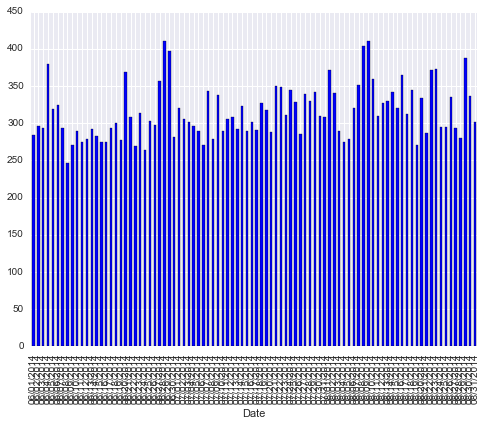

In [94]:
figure, ax = plt.subplots(figsize=(8,6))
ax = incidents_by_days.plot(kind='bar') # (kind='bar')

#index=date_range('1/1/2000', periods=1000)

In [95]:
incidents_by_month = sf.groupby('Month').size()  # number of crimes for each month, 3 months
incidents_by_month

Month
6     9114
7     9671
8    10208
dtype: int64

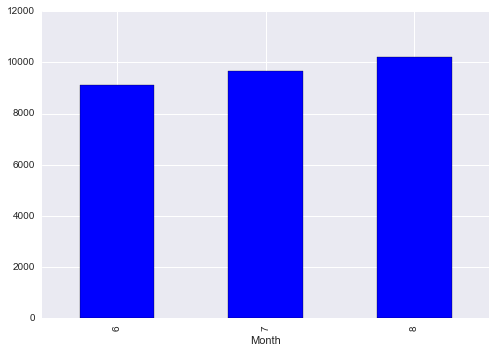

In [96]:
incidents_by_month.plot(kind='bar')

# Questions

### Question 1. For either city, how do incidents vary by time of day?

qwqeqweqweqwe

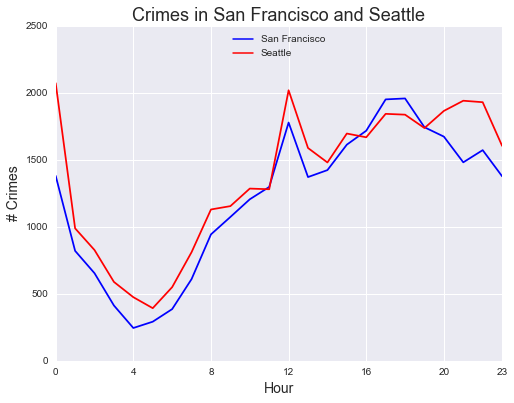

In [15]:
# draw a graph with mathplotlib

# prepare data for the graph axes
hours = np.arange(0,24, 1)  # x-axis

y_sf     = sf['Hour'].value_counts().sort_index()
y_seatle = seatle['Hour'].value_counts().sort_index()

figure, ax = plt.subplots(figsize=(8,6))

# Create plots with pre-defined labels.
ax.plot(hours, y_sf ,    'b-', label='San Francisco')   # 'bs' blue squares
ax.plot(hours, y_seatle, 'r-', label='Seattle')         # 'r^' red triangles
#ax.plot(hours, y_sf ,    'bo')   
#ax.plot(hours, y_seatle, 'rs')         

plt.xticks(([0,4,8,12,16,20,23]))
plt.axis([0,23, 0, 2500])

# Add the legend with some customizations.
legend = ax.legend(loc='upper center', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.60')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('medium')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width 

plt.title('Crimes in San Francisco and Seattle', fontsize=18)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('# Crimes', fontsize=14)
plt.grid(True)

plt.show()

In [16]:
crimes_by_hour = seatle['Hour'].value_counts().order() # order() by value; .sort_index(by='b') .sort_index(by=['a',b']) 

### Question 2. Which incidents are most common in the evening?

Data for evening hours 6 pm to 1 am was selected for San Francisco. The most common incidents are related to theft (LARCENY/THEFT code) with 4419 cases. Next three categories of incidents near 1000 cases each are VEHICLE THEFT (1038 cases), ASSAULT(1193 cases) and OTHER OFFENSES (1397 cases). The last category in top 5 evening incidents is NON-CRIMINAL (994) cases. The category of the incidents during these peak hours are shown in the histogram of Figure 2.

In [17]:
# San Francisco
sf[(sf['Hour']>=18) | (sf['Hour'] <=1)]['Category'].value_counts()[0:5]
#sf[(sf['Hour']>=18) | (sf['Hour'] <=1)].groupby(['Category'], sort=False).size().order() # Evening crimes by category.   Series

LARCENY/THEFT     4419
OTHER OFFENSES    1397
ASSAULT           1193
VEHICLE THEFT     1038
NON-CRIMINAL       994
dtype: int64

In [18]:
sf_most_common_crimes_evening = sf[(sf['Hour']>=18) | (sf['Hour'] <=1)]['Category'].value_counts()

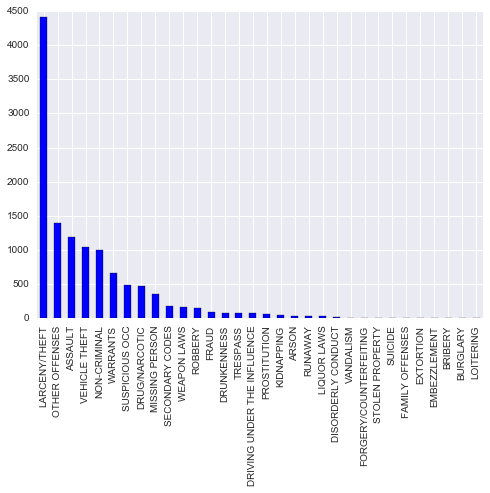

In [64]:
sf_most_common_crimes_evening.plot(kind='bar')

Data for evening hours 6 pm to 1 am was selected for Seattle. The most common incidents are related to theft (THEFT-CARPROWL code) with 3300 cases. Next largest category of incidents is also represented from theft group: VEH-THEFT-AUTO (1474 cases).

In [19]:
# Seattle
seatle[(seatle['Hour']>=18) | (seatle['Hour'] <=1)]['Offense Type'].value_counts()[0:5] # Evening crimes by category.   Series

THEFT-CARPROWL                    3330
VEH-THEFT-AUTO                    1474
PROPERTY DAMAGE-NON RESIDENTIA     785
THEFT-OTH                          725
ASSLT-NONAGG                       561
dtype: int64

### Question 3. During what periods of the day are robberies most common?

The most common hours for roberies occur are evening and night hours from 5:00 PM to 3:00 AM as expected. For example, for all three summer 2014 months in San Francisco total number of roberry cases is presented in the histogram (Figure 3). The only one outlier is 12-th hour (21 cases) that corresponds to 12:00 PM (noon) to 1:00 PM.

In [20]:
sf[sf['Category'] == 'ROBBERY'].groupby(['Hour'])['Category'].size().order()[-11:-1] #value_counts() # Series

Hour
19    15
17    15
18    16
20    16
21    18
0     18
2     19
1     20
22    21
12    21
dtype: int64

In [22]:
sf_robbery_by_hour = sf[sf['Category'] == 'ROBBERY'].groupby(['Hour'])['Category'].size()

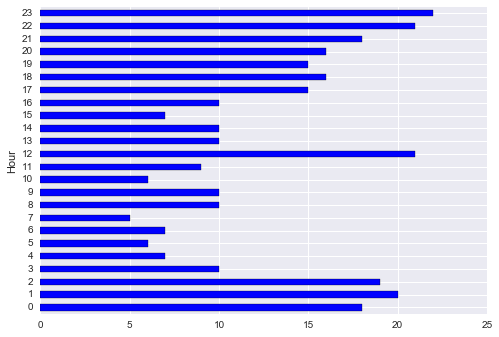

In [23]:
sf_robbery_by_hour.plot(kind="barh")

### Question 4. For either city, how do incidents vary by neighborhood?

1. Insert CROSSTABULATING table:    district x category_incident  and VALUE in the cell
2. Learn TABLEA visualization - % in cells like for clustering

In [10]:
print seatle.groupby('District/Sector').size().order()
print seatle.groupby('Zone/Beat').size().order().count()   #  52 zones - TOO much

District/Sector
99      40
O     1081
W     1324
G     1394
F     1594
S     1607
C     1680
Q     1805
R     1841
L     1982
D     2063
U     2160
J     2204
E     2255
N     2333
B     2338
K     2379
M     2642
dtype: int64
52


In [12]:
sf.groupby('PdDistrict').size().order()

PdDistrict
RICHMOND      1546
PARK          1693
TARAVAL       1853
TENDERLOIN    2257
INGLESIDE     2378
BAYVIEW       2725
CENTRAL       3513
NORTHERN      3589
MISSION       3700
SOUTHERN      5739
dtype: int64

### Question 5. Which incidents are most common in the city center?

1. Add city maps for analysis, which disctrict to take as "center"
2. Analyse counts for the city center discticts
3. Insert <cite>ESRI</cite> map (PDF) and link to the (a) live map and (b) presentation

Map Info at ESRI portal [http://www.arcgis.com/home/item.html?id=e9670731617c4ecabc101bcd4ac09147](http://www.arcgis.com/home/item.html?id=e9670731617c4ecabc101bcd4ac09147 "some text")
        
Web presentation (map) [http://www.arcgis.com/apps/presentation/index.html?webmap=e9670731617c4ecabc101bcd4ac09147&slide=1](http://www.arcgis.com/apps/presentation/index.html?webmap=e9670731617c4ecabc101bcd4ac09147&slide=1 "some text")  



### Question 6.  In what areas or neighborhoods are robberies or thefts most common?

1. Insert ESRI map (PDF) and link to the live map and PPT - the most criminal disctricts
2. Print Table counts here

### Question 7.  How do incidents vary month to month in the Summer 2014 dataset? 

### Quiestion 8. Which incident types tend to correlate with each other on a day-by-day basis?

### Quiestion 9 (adv).  What can we infer broadly about the differences in crime patterns between Seattle and San Francisco?

### Question 10 (adv). Does one city tend to have more crime than the other, per capita? 

### Question 11 (adv). Do the relative frequencies of types of incidents change materially between the two cities? 

(NOTE: The two datasets do not have the same schema, so comparisons will require some work and some assumptions. 
     This will require extra work, but you will be working at the forefront of what is known!)

### Question 12 (adv). For either city, do certain crimes correlate with environmental factors such as temperature? 

(To answer this kind of question, you will need to identify and use external data sources!)

In [305]:
# brewer2 py graphical library

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

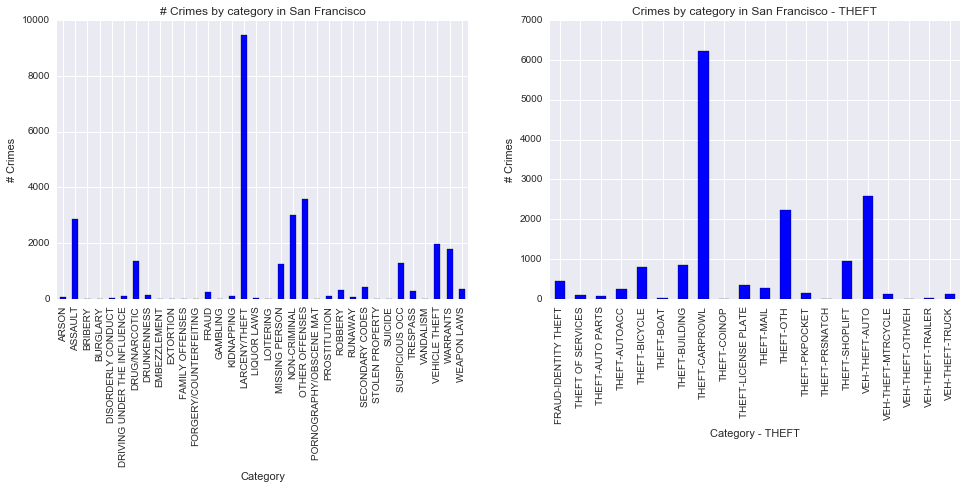

In [24]:
plt.subplot(131)
categ = sorted(sf['Category'].unique(), key=lambda str: str[0:2]) 
x2 = categ                                       # 1 col:   Category,        type:  list
y2 = sf['Category'].value_counts().sort_index()  # 2 cols:  Category, count; type:  pd: Series
plt.xlabel('Category')
plt.ylabel('# Crimes')
plt.title('# Crimes by category in San Francisco')
y2.plot(kind='bar', figsize=(25,5))

plt.subplot(132)
mask = seatle['Offense Type'].str.contains('THEFT')       # 9466
#theft_categ_seatle = sorted(seatle[mask]['Offense Type'].unique(), key=lambda str: str[0:2])  
x3 = sorted(seatle[mask]['Offense Type'].unique())             # 1 col:   Category,             type:  list 
y3 = seatle[mask]['Offense Type'].value_counts().sort_index()  # 2 cols:  Category, count;      type:  pd: Series

#df3 = pd.DataFrame({'Category': theft_categ_seatle})          # 2 col: index [0:19], Category    type: DataFrame
#arr3 = seatle[mask]['Offense Type'].unique()                  # as row: numpy.ndarray

plt.xlabel('Category - THEFT')
plt.ylabel('# Crimes')
plt.title('Crimes by category in San Francisco - THEFT')
y3.plot(kind='bar')#, figsize=(20,5))

In [833]:
#ppl.pcolormesh(arr2D)  # OK

In [590]:
#scatter_matrix(ct2.ix[18:23,0:5], alpha=0.8, figsize=(16, 8), diagonal='kde');
#scatter_matrix(, alpha=0.8, figsize=(16, 8), diagonal='kde');

In [25]:
#sf.groupby('Category')['Category'].count()
gb_categ = sf.groupby('Category')['Category']
gb_hour  = sf.groupby('Category')['Hour']

In [26]:
ct = pd.crosstab(sf.Month, sf.Category, margins=True)  # DataFrame

categ = sf['Category'] #[(sf['Category'] == 'DRUG/NARCOTIC') | (sf['Category'] == 'LARCENY/THEFT')]   # Series
ct2 = pd.crosstab(categ, sf.Hour[(sf['Hour'] >= 17) | (sf['Hour'] <= 1)]) #, margins=True)  # DataFrame
#ct_gb = pd.crosstab(gb_hour, gb_categ) 

mask = seatle['Offense Type'].str.contains('THEFT')       # 9466
#theft_categ_seatle = sorted(seatle[mask]['Offense Type'].unique(), key=lambda str: str[0:2])  
x3 = sorted(seatle[mask]['Offense Type'].unique())             # 1 col:   Category,             type:  list 
y3 = seatle[mask]['Offense Type'].value_counts().sort_index()  # 2 cols:  Category, count;      type:  pd: Series
y3[0:2]

FRAUD-IDENTITY THEFT    458
THEFT OF SERVICES        96
dtype: int64

In [27]:
n = sf['Category'].count()
print n
crimes_sf = sf.groupby(['Category'])['datetime'].size().order() # Roberries by date (YYYY-MM_DD).   Series, 34 categories
c_one = pd.Series(np.ones(n, dtype=np.int64), index=sf.index)
sf['one'] = c_one
#crimes_sf[0:2]

28993


In [28]:
###crimes_sf_df = sf.pivot('Category', 'datetime', 'one')  # Error

sf_categ_pivot = pd.pivot_table(sf_categ_most, values='one', index=['Month'], columns=['Category'], aggfunc=np.sum, fill_value=0)
#seatle_by_month = seatle.pivot_table('contb_receipt_amt', cols='Month', aggfunc='sum')

#sf_categ_pivot #.sum()[0:35]
#sf_categ_pivot[sf_categ_pivot['Category'].isin(categ_most)] #.isin(categ_most)
#sf_categ_pivot #.get_group('datetime')

In [29]:
#sns.corrplot(ct2, figure=(20,12))   # workd, too small, 34 catgories
sf_categ_pivot.T.corr()

Month,6,7,8
Month,,,
6,1.000000,0.997877,0.993934
7,0.997877,1.000000,0.997446
8,0.993934,0.997446,1.000000


D:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
D:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


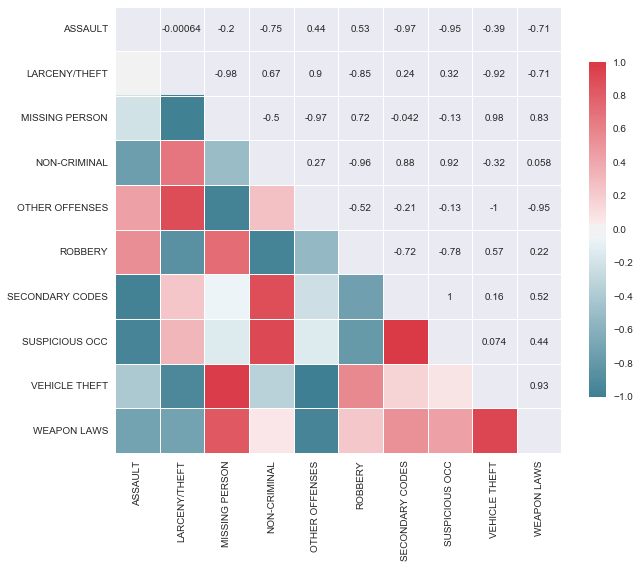

In [39]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
#f.tight_layout()

corr_mtrx = sf_categ_pivot.corr()

# Generate a custom diverging colormap, using seaborn library (sns)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mtrx, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the coorellation plot as a heatmap with the mask and correct aspect ratio 
sns.corrplot(sf_categ_pivot, annot=True, diag_names=False, cmap=cmap, ax=ax)
            # annot: corr.values  annot_kws={"size":9} linewidths=0.1  

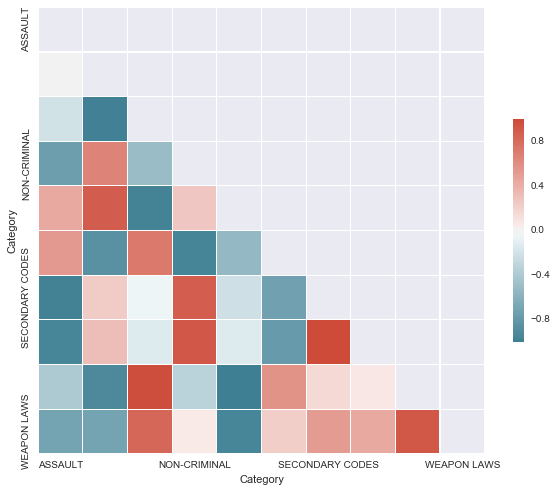

In [38]:
# Calculate correlation matrix
corr_mtrx = sf_categ_pivot.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
#f.tight_layout()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 16, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mtrx, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio using seaborn library
sns.heatmap(corr_mtrx, mask=mask, cmap=cmap, vmax=1., 
             square=True, xticklabels=3, yticklabels=3, linewidths=.1, cbar_kws={"shrink": .5}, ax=ax)

In [30]:
sf_categ_most
#plt.figure(figsize=(11, 9))
#radviz(sf_categ_most['one'], 'Category');

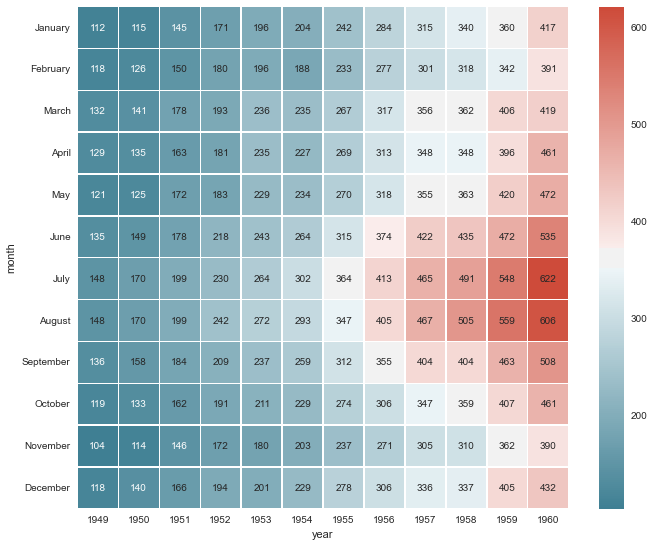

In [97]:
#ppl.pcolormesh(ct) # error. ct - DataFrame
sns.set()
f, ax = plt.subplots(figsize=(11, 9))
# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")                   # DataFrame["year","month","passangers"] - last is number
flights = flights_long.pivot("month", "year", "passengers")  # DataFrame but pivot table

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 16, as_cmap=True)

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.1, cmap=cmap)

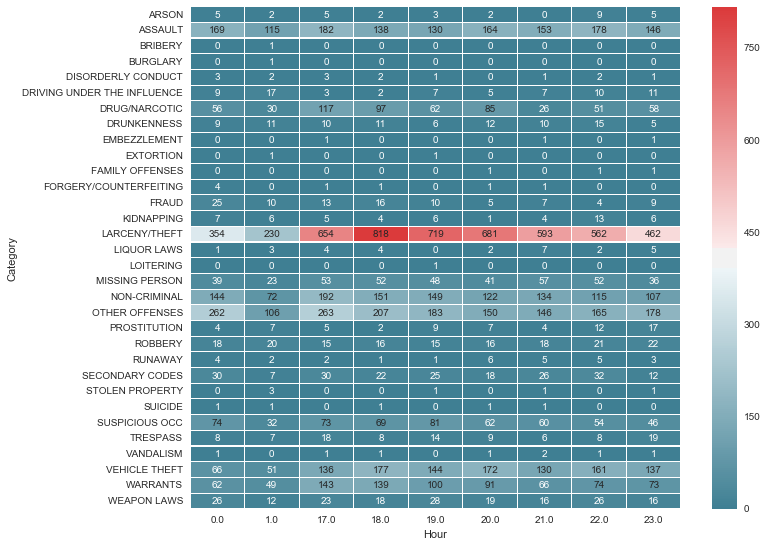

In [40]:
#ppl.pcolormesh(ct) # error. ct - DataFrame
sns.set()
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 12, as_cmap=True)

# Draw a heatmap with the numeric values in each cell
sns.heatmap(ct2, annot=True, fmt="d", linewidths=.1, cmap=cmap)   #ct2 (cross-tabulation)  or pivot table

## Data cleansing and preprocessing 

The original data is dirty. Some of them have missing values or zero (improper) values, which leads to the wrong data analysis and wrong visualization. For examples, the first attemp to visualize placement of Top 3 categories of incidents by x,y coordinates (longitude, latitude) for Seattle city looks as folloing in the Figure.

In [31]:
nn = len(seatle['Offense Type'])
seatle['one'] = pd.Series(np.ones(nn, dtype=np.int64), index=seatle.index)

seatle_categ_3 = ['THEFT-CARPROWL','VEH-THEFT-AUTO','THEFT-OTH']
mask = seatle['Offense Type'].isin(seatle_categ_3)
maskY = seatle['Latitude']  > 0.0 
maskX = seatle['Longitude'] < 0.0 
df_test = seatle[mask & maskX & maskY][['Offense Type','Longitude','Latitude']]  
df_test[0:2]
#[-122.242332,-122.242331,47.465029,47.733937]

,Offense Type,Longitude,Latitude
4,THEFT-OTH,-122.329379,47.685960
12,THEFT-OTH,-122.344997,47.725036


In [32]:
url_iris = "file:\\\D:\Anaconda\Lib\site-packages\bokeh\sampledata\iris.csv"
df_iris = pd.read_table("iris.csv", sep=',', quotechar='\"')
#df_iris[0:2] #.species.unique() # 'setosa', 'versicolor', 'virginica'

df_iris[0:2] 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [33]:
pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c','d'])

a    1
b    2
c    3
d    4
dtype: float64

In [34]:
iris = pd.DataFrame()

d = {'species' :        df_iris['species'], 
     'sepal_length'   : df_iris['sepal_length'],
     'sepal_width'    : df_iris['sepal_width']} 
# d = {'one' : pd.Series([1., 2., 3., 0.], index=['a', 'b', 'c','d']), 
#      'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c','d']) }
df = pd.DataFrame(d)
df[0:2]
#plt.figure(figsize=(10,6))
#radviz(df,'species')
#radviz(df,'a')       

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa


In [35]:
plt.figure(figsize=(10,6))
radviz(df,'species')

In [36]:
df_iris[0:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


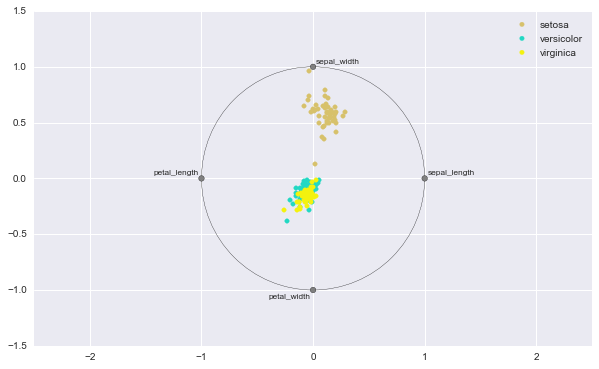

In [33]:
plt.figure(figsize=(10,6))
radviz(df_iris,'species')

In [34]:
tips = pd.read_table("tips_data.csv", sep=',', quotechar='\"')
tips[0:2]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [40]:
sf[['Hour','Date']][13:18]

,Hour,Date
13,23,08/31/2014
14,23,08/31/2014
15,22,08/31/2014
16,22,08/31/2014
17,22,08/31/2014


In [77]:
### dt = np.dtype((str, 6))   # data type: 6-character string (bytes)
### dt = np.dtype(('U', 6))   # data type: 6-character unicode string

sf['hour_period'] = pd.Series(np.empty(n_sf, dtype=np.dtype('U', 6)), index=sf.index)  # garbage, no initialization
mask_night        = np.empty(n_sf, dtype=bool)
mask_categ        = sf['Category'].isin(['LARCENY/THEFT','ASSAULT']) # 'OTHER OFFENSES','NON-CRIMINAL',
####mask_hour  = sf['Hour'].isin([0,1,2,18,19,20,21,22,23])   # NOT for numeric data

In [78]:
#sf.drop('hour_period',axis=1)
sf[['Hour','Date','hour_period']][150:170]
#sf[mask_night][12:18]['Hour']

,Hour,Date,hour_period
150,16,08/31/2014,
151,16,08/31/2014,
152,16,08/31/2014,
153,16,08/31/2014,
154,16,08/31/2014,
155,16,08/31/2014,
156,15,08/31/2014,
157,15,08/31/2014,
158,15,08/31/2014,
159,15,08/31/2014,


In [55]:
## sf = sf.drop('hour_categ',axis=1)  (!!!)
sf[0:2]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,one,Year,Month,Day,Hour,datetime
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,1,2014,8,31,23,2014-08-31 00:00:00
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,1,2014,8,31,23,2014-08-31 00:00:00


In [79]:
# filter data by most criminal categories and night hours
#print sf[['hour_period','Hour','Category']]
i = 0
#for i in range(16):  
for field in sf['Hour']:
    if  (field <= 1) & (field >= 18):  
        mask_night[i]        = True    # night
        sf['hour_period'][i] = u"Night"
    else:
        mask_night[i]        = False  # day
        sf['hour_period'][i] = u"Day"
    #print sf['Hour'][i],'\t', mask_night[i], '\t', mask_categ[i], '\t', sf['Category'][i]       
    i += 1
    #if i > 50:
    #    break

#print sf[['hour_period','Hour','Category']]
    #  
#print sf.groupby('hour_categ')['hour_categ'].count()
#sf.groupby('Hour')['Category'].size().order()[-11:-1] #value_counts() # Series
#print sf[12:17]['Hour']


#sf[mask_categ & mask_night][['Hour','Category','Month','datetime','one']]

#sf_night_categ_most['hour_period'] = sf[mask_categ & mask_night][['Hour','Category','Month','datetime','one']] #.sort('Month')
#sf_night_categ_most['hour_period']

D:\Anaconda\Lib\site-packages\IPython\kernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
#sf[['hour_period','Hour','Category']][0:5]
for i in range (500):
    if mask_night[i]:
        print i,mask_night[i]
    i += 1

In [49]:
sf_night_categ_most = sf[mask_categ & mask_night][['Hour','Category','Month','datetime','one','hour_period','hour_categ']] #.sort('Month')
sf_night_categ_most[0:24]

,Hour,Category,Month,datetime,one,hour_period,hour_categ
51,21,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
52,21,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
54,21,ASSAULT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
55,21,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
56,21,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
57,20,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
58,20,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
60,20,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
61,20,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014
62,20,LARCENY/THEFT,8,2014-08-31 00:00:00,1,08/31/2014,08/31/2014


In [119]:
g = sns.FacetGrid(crime_data, row="Category", col="Month", hue="one")
g.map(plt.scatter, "X", "Y")
g.add_legend()

NameError: name 'crime_data' is not defined

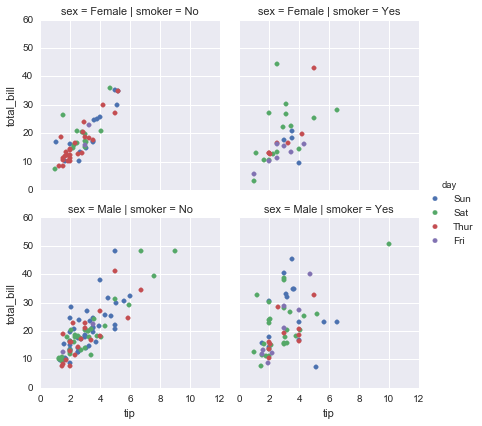

In [235]:
g = sns.FacetGrid(tips, row="sex", col="smoker", hue="day")
g.map(plt.scatter, "tip", "total_bill")
g.add_legend()

In [188]:
#df_test['Offense Type'].unique()  # (['THEFT-OTH', 'THEFT-CARPROWL', 'VEH-THEFT-AUTO']
type(df_test[:][0:3]['Offense Type'])

pandas.core.series.Series

KeyError: 'Offense Type'

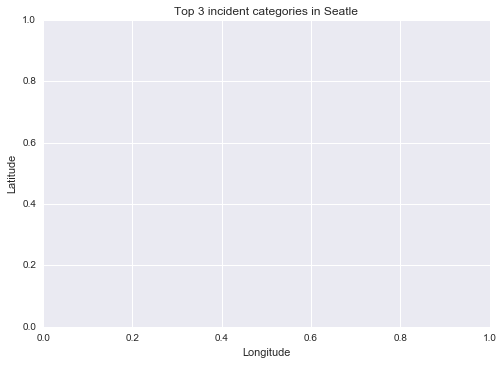

In [180]:
plt.figure()
#figure, ax = subplots(figsize=(8,6))
#axis([[122.242332,-122.242331,47.465029,47.733937])

plt.title('Top 3 incident categories in Seatle')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

radviz(df_test[:]['Offense Type'],'Offense Type')

In [177]:
#df_test.plot(kind='scatter', x='Longitude',y='Latitude', color=['b','r','g'], \
#             label='THEFT', title='Top 3 incident categories in Seatle')

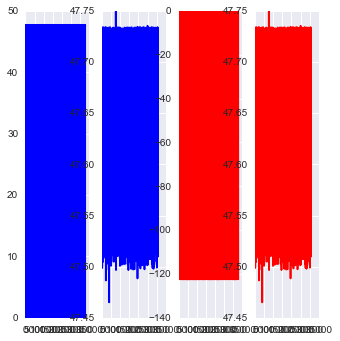

In [76]:
#df_test['Latitude'].mean()
nn      = seatle['Hour'].count()
nn_mask = seatle[maskX & maskY]['Hour'].count()

x_val = range(nn)
x_val_mask = range(nn_mask)

#figure, ax = subplots(figsize=(8,6))
#figure, ax = plt.subplot(161)
plt.subplot(161)
plt.plot(x_val,seatle['Latitude'], 'b-', label='Latitude')

plt.subplot(162)
plt.plot(x_val_mask,seatle[maskX & maskY]['Latitude'], 'b-', label='Latitude (cleansed)')

plt.subplot(163)
plt.plot(x_val,seatle['Longitude'],'r-', label='Longitude')

plt.subplot(164)
plt.plot(x_val_mask,seatle[maskX & maskY]['Latitude'], 'r-', label='Latitude (cleansed)')

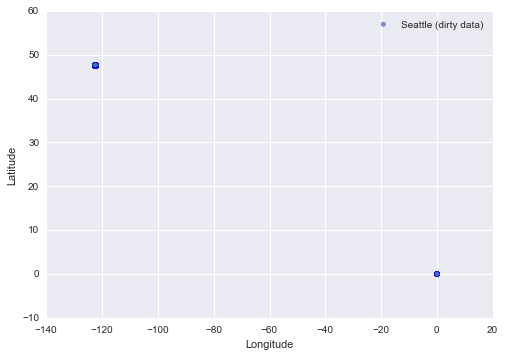

In [45]:
seatle.plot(kind='scatter',x='Longitude',y='Latitude',color='Blue', alpha=0.7, label = "Seattle (dirty data)")

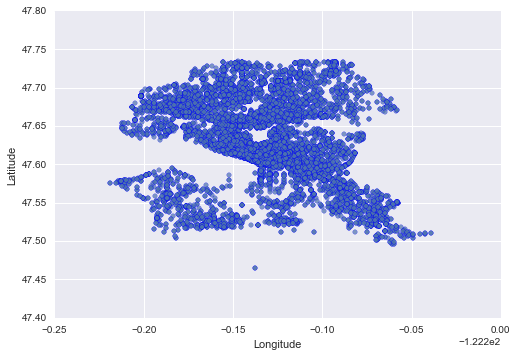

In [90]:
seatle[mask & maskX & maskY].plot(kind='scatter',x='Longitude',y='Latitude',color='Blue', alpha=0.7)

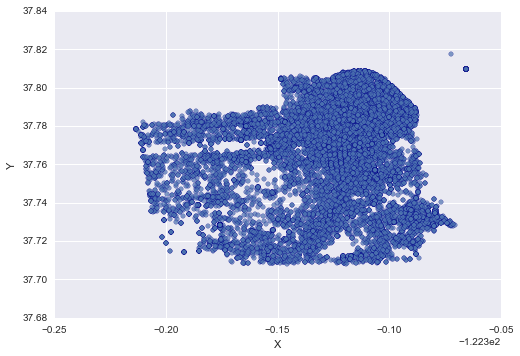

In [95]:
sf.plot(kind='scatter',x='X',y='Y',color='DarkBlue', alpha='0.7')

In [218]:
sf[['X','Y']].describe()

,X,Y
count,28993.000000,28993.000000
mean,-122.421961,37.768911
std,0.025313,0.023604
min,-122.513642,37.708083
25%,-122.432224,37.756486
50%,-122.415633,37.775421
75%,-122.406521,37.785094
max,-122.365565,37.817315


In [217]:
seatle[['Longitude','Latitude']].describe()

,Longitude,Latitude
count,32779.000000,32779.000000
mean,-114.680394,44.646274
std,29.620933,11.531858
min,-122.425315,0.000000
25%,-122.346076,47.580045
50%,-122.328713,47.614196
75%,-122.307333,47.664051
max,0.000000,47.749606


In [219]:
seatle[maskX & maskY][['Longitude','Latitude']].describe()

,Longitude,Latitude
count,30729.000000,30729.000000
mean,-122.330978,47.624726
std,0.030513,0.055530
min,-122.425315,47.465063
25%,-122.347717,47.598289
50%,-122.331082,47.615838
75%,-122.313446,47.667648
max,-122.238970,47.749606


In [ ]:
print seatle[seatle['Longitude'] < 0]['Longitude'].count(),seatle[seatle['Latitude'] > 0]['Latitude'].count()
print seatle[seatle['Longitude'] == 0]['Longitude'].count(),seatle[seatle['Latitude'] == 0]['Latitude'].count()

In [81]:
def pastel(colour, weight=2.4):
    """ Convert colour into a nice pastel shade"""
    rgb = np.asarray(colorConverter.to_rgba(colour))
    # scale colour
    maxc = max(rgb)
    if 0 < maxc and maxc < 1.0:
        # scale colour
        rgb = rgb / maxc
    # now decrease saturation
    total = rgb.sum()
    slack = 0
    for x in rgb:
        slack += 1.0 - x

    # want to increase weight from total to weight
    # pick x s.t.  slack * x == weight - total
    # x = (weight - total) / slack
    x = (weight - total) / slack

    rgb = [c + (x * (1.0 - c)) for c in rgb] 

    return rgb

def get_colours(n, flag):
    """ Return n pastel colours. """
    base = np.asarray([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    if n <= 3:
        return base[0:n]

    # how many new colours to we need to insert between
    # red and green and between green and blue?
    needed = (((n - 3) + 1) / 2, (n - 3) / 2)

    colours = []
    for start in (0, 1):
        for x in np.linspace(0, 1, needed[start] + 2):
            colours.append((base[start] * (1.0 - x)) +
                           (base[start + 1] * x))
    
    if (flag ==0):
        return [c for c in colours[0:n]] 
    else:
        return [pastel(c) for c in colours[0:n]]

color: 255   50   50
color: 187  119   50
color: 119  187   50
color:  50  255   50
color:  50  255   50
color:  50  153  153


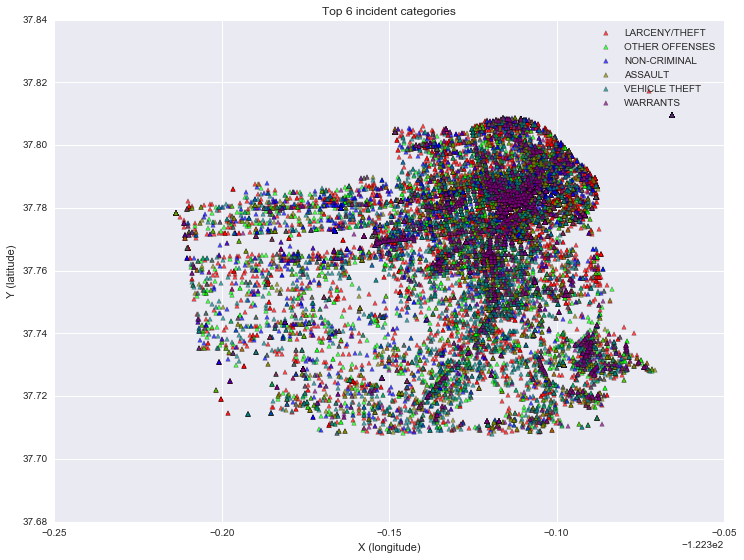

In [82]:
# prepare different colors for Top 12 category of incidents (count, order)
# create a DataFrame for San Francisco by different time periods
categ_most = ['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','VEHICLE THEFT','WARRANTS'] #,'DRUG/NARCOTIC ','SUSPICIOUS OCC','MISSING PERSON','SECONDARY CODES','WEAPON LAWS','ROBBERY']
sf_categ_most = sf[['Category','Month','datetime','one','X','Y']][sf.Category.isin(categ_most)] # Series

n_categ = len(sf.groupby('Category')['Category'].count())  # 34 categories
n_categ_most = len(categ_most) # Top N incident categories

colors  = get_colours(n_categ_most,1)  # (n_categ,0)

mycolors = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1],[0.5, 0.5, 0],[0, 0.5, 0.5],[0.5, 0, 0.5]])

for i in range(n_categ_most):
    cc = (list(colors[i]))
    print 'color: %3d  %3d  %3d' % (int(cc[0]*255),int(cc[1]*255),int(cc[2]*255))
    #cc = (list(colors[i]))
    #print 'color: %.3f  %.3f  %.3f' % (cc[0],cc[1],cc[2])    

#print sf_categ_most[0:6]
#print "Top ",n_categ_most," of",n_categ, " incident categories are drawn"

#sf_month_ct.plot(kind='scatter', x="X",y="Y") #x='Month', y='Category')

# x and y MAY be numerical like X,Y  OR categorial like Month,Category (!!!)
fig = plt.figure(figsize=(12,9)) # fig,ax = plt.subplots(figsize=(10,9))
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

ax.set_title("Top 6 incident categories")
ax.set_xlabel("X (longitude)")
ax.set_ylabel("Y (latitude)")

#ax.scatter(sf['Month'], sf['Category'], color="blue",   marker="o", alpha=0.7)  # OK (!)
#ax.scatter(sf['X'],     sf['Y'],        color="#00AACC", marker="^", alpha=0.7)

i=0
for categ in categ_most:
    # select points for this category
    xx = sf_categ_most['X'][sf_categ_most['Category'] == categ]
    yy = sf_categ_most['Y'][sf_categ_most['Category'] == categ]
    ax.scatter(xx,yy, c=mycolors[i], label=categ, marker="^", alpha=0.7)  # legend: label
    ax.legend()
    i += 1

# 6 different colors for each category but no legend (?)
#ax.scatter(sf_categ_most['X'],sf_categ_most['Y'], c=colors, marker="^", alpha=0.7)  # OK
#ax.legend()
    
fig.savefig("scatterplot.png")

#plot(kind='scatter', x="X",y="Y") # x="X",y="Y") - OK; y="Month",x="Day") OK

In [127]:
# Slicing

#groups = pd.qcut(categ_most['one'], 12, labels=False)
#categ_most['Category'] = groups.labels

data = range(0,11,1)
print data
pd.qcut(data, 5) #labels=['A','B','C','D','E'])

# data: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   

# with Labels, automatically
# Categories (5, object): [[0, 2] < (2, 4] < (4, 6] < (6, 8] < (8, 10]]

# labels=['A','B','C','D','E']  are assigned empliciltely
# [A, A, A, B, B, ..., C, D, D, E, E]
# Categories (5, object): [A < B < C < D < E]

# labels=False
# array([0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4], dtype=int64)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


[[0, 2], [0, 2], [0, 2], (2, 4], (2, 4], ..., (4, 6], (6, 8], (6, 8], (8, 10], (8, 10]]
Length: 11
Categories (5, object): [[0, 2] < (2, 4] < (4, 6] < (6, 8] < (8, 10]]

In [128]:
groups = pd.qcut(sf['Category'], 5)
#pData['groups'] = groups.labels

colors = ['b', 'r', 'g', 'm', 'y']

i = 0
for k, df in sf.groupby('Category'):
    scatter(sf['X'], sf['Y'], c=colors[i], label=groups.levels[k], alpha=.6)
    i += 1
'''    
legend()
xlim(-2, 200)
ylim(0, 250000)
xlabel('X')
ylabel('Y')
title('by Zone')
'''

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [250]:
sf_categ_most[0:4] #_pivot = sf_categ_most.pivot_table("Category", "Month", "one")

,Category,Month,datetime,one
1,NON-CRIMINAL,8,2014-08-31 00:00:00,1
2,LARCENY/THEFT,8,2014-08-31 00:00:00,1
3,LARCENY/THEFT,8,2014-08-31 00:00:00,1
4,NON-CRIMINAL,8,2014-08-31 00:00:00,1


NameError: name 'xlabel' is not defined

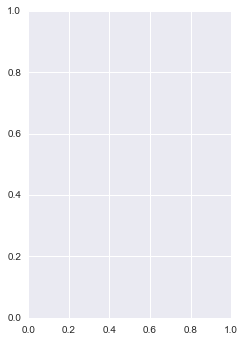

In [56]:
population_sf     = 825000 # 2014
population_seatle = 652000 # 2014

xx, yy = np.meshgrid(np.linspace(0, 23, 1), np.linspace(0, 2500, 500))

y4 = sf['Hour'].value_counts().sort_index();       # type: Series. 2 cols: Hour, count
# df.plot()   # non-visible: too many axex
plt.subplot(121)
xlabel('Hours')
ylabel('# Crimes')
title('# Crimes by hour in San Francisco')

plt.axis([0, 23, 0, 2500])
y4.plot(kind='bar', figsize=(16,5)) #, sharey=True);
#ts = pd.Series(df)
#ts.plot()  # OK

#plt.axhline(12, color='k', ls='--')
#plt.axvline(4, color='k', ls=':')
#plt.axvline(8, color='k', ls=':')
#plt.axvline(12, color='k', ls=':')
#plt.axvline(16, color='k', ls=':')
#plt.axvline(20, color='k', ls=':')

#plt.axhline(1000, color='k', ls='-.')
#lt.axhline(2000, color='k', ls='-.')

#plt.xticks(())
#plt.yticks(())
#plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])

y5 = seatle['Hour'].value_counts().sort_index();   # type: Series. 2 cols: Hour, count
# df.plot()   # non-visible: too many axex
plt.subplot(122)
xlabel('Hours')
ylabel('# Crimes')
title('# Crimes by hour in Seattle')

#plt.axvline(4, color='k', ls=':')
#plt.axvline(8, color='k', ls=':')
#plt.axvline(12, color='k', ls=':')
#plt.axvline(16, color='k', ls=':')
#plt.axvline(20, color='k', ls=':')

#plt.axhline(1000, color='k', ls='-.')
#plt.axhline(2000, color='k', ls='-.')

plt.axis([0, 23, 0, 2500])
y5.plot(kind='bar', figsize=(16,5)) # , sharey=True);
#plt.hist(y5)


In [248]:
(y5/population_seatle * 100).max()

0.3179447852760736

In [247]:
(y4/population_sf * 100).max()

0.23745454545454547

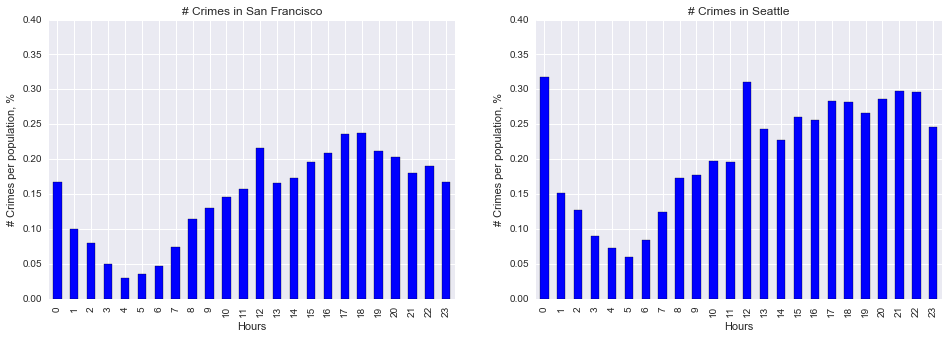

In [131]:
population_sf     = 825000 # 2014
population_seatle = 652000 # 2014

xx, yy = np.meshgrid(np.linspace(0, 23, 1), np.linspace(0, 2500, 500))

y4_proc = (sf['Hour'].value_counts()/population_sf*100).sort_index();       # type: Series. 2 cols: Hour, count
# df.plot()   # non-visible: too many axex
plt.subplot(121)
plt.xlabel('Hours')
plt.ylabel('# Crimes per population, %')
plt.title('# Crimes in San Francisco')

plt.axis([0, 23, 0, 0.4])
y4_proc.plot(kind='bar', figsize=(16,5)) #, sharey=True);

#ts = pd.Series(df)
#ts.plot()  # OK

'''
plt.axhline(12, color='k', ls='--')
plt.axvline(4, color='k', ls=':')
plt.axvline(8, color='k', ls=':')
plt.axvline(12, color='k', ls=':')
plt.axvline(16, color='k', ls=':')
plt.axvline(20, color='k', ls=':')

plt.axhline(0.1, color='k', ls=':')
plt.axhline(0.2, color='k', ls=':')
plt.axhline(0.3, color='k', ls=':')
'''

#plt.xticks(())
#plt.yticks(())
#plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])

y5_proc = (seatle['Hour'].value_counts()/population_seatle*100).sort_index();   # type: Series. 2 cols: Hour, count

# df.plot()   # non-visible: too many axex
plt.subplot(122)
plt.xlabel('Hours')
plt.ylabel('# Crimes per population, %')
plt.title('# Crimes in Seattle')

#plt.axvline(4, color='k', ls=':')
#plt.axvline(8, color='k', ls=':')
#plt.axvline(12, color='k', ls=':')
#plt.axvline(16, color='k', ls=':')
#plt.axvline(20, color='k', ls=':')

#plt.axhline(0.1, color='k', ls=':')
#plt.axhline(0.2, color='k', ls=':')
#plt.axhline(0.3, color='k', ls=':')

plt.axis([0, 23, 0, 0.4])
y5_proc.plot(kind='bar', figsize=(16,5)) # , sharey=True);

#plt.hist(y5)

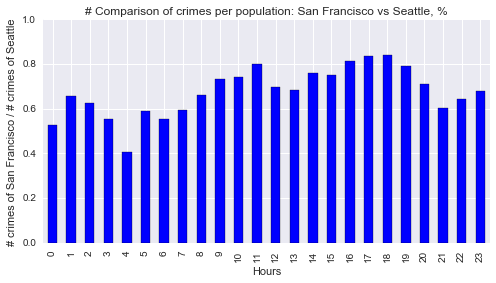

In [133]:
y6_proc = (y4_proc/y5_proc);   # type: Series. 2 cols: Hour, count

plt.axis([0, 23, 0, 1])

plt.xlabel('Hours')
plt.ylabel('# crimes of San Francisco / # crimes of Seattle')
plt.title('# Comparison of crimes per population: San Francisco vs Seattle, %')

y6_proc.plot(kind='bar', figsize=(8,4)) # , sharey=True);

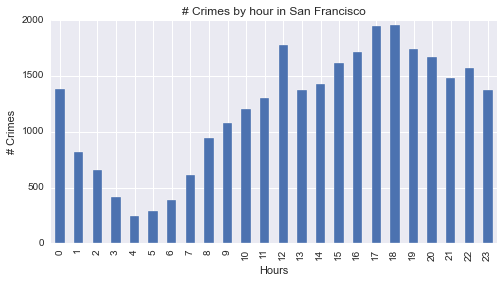

In [854]:
y4 = sf['Hour'].value_counts().sort_index();       # type: Series. 2 cols: Hour, count
# df.plot()   # non-visible: too many axex
#plt.subplot(123)
xlabel('Hours')
ylabel('# Crimes')
title('# Crimes by hour in San Francisco')
y4.plot(kind='bar', figsize=(8,4))#, sharex=True);
#ts = pd.Series(df)
#ts.plot()  # OK

In [ ]:
sf.groupby('Hour').count()['Category'][0:3] #.order()

In [22]:
hours1 = [5, 7, 6, 3, 4]   #list
hours1.sort(key=sortByValue, reverse=True)  # sort inside the array
hours1

[7, 6, 5, 4, 3]

In [648]:
hours1 = [5, 7, 6, 3, 4]   #list
hours1_sorted = sorted(hours1, key=sortByValue, reverse=False)
hours1_sorted

[3, 4, 5, 6, 7]

In [23]:
def sortByValue(x_int):
        return x_int
    
hours_uniq = sf['Hour'].unique()
hours = sorted(hours_uniq, key=sortByValue)

In [637]:
a = [  (1, "ABC", "BC12"),  (2, "BCD", "BC23"),  (3, "DEF", "BC34")]
sorted(a, key=lambda x: x[1], reverse=True)
#   [(3, 'DEF', 'BC34'), (2, 'BCD', 'BC23'), (1, 'ABC', 'BC12')]

[(3, 'DEF', 'BC34'), (2, 'BCD', 'BC23'), (1, 'ABC', 'BC12')]

In [646]:
student = [ ('John', 'A', 22), ('Jane', 'C', 20),  ('Dave', 'B', 18)]
sorted(student, key=lambda student: student[2])         # sort by age
# [('Dave', 'B', 18), ('Jane', 'B', 20), ('John', 'A', 22)]

[('Dave', 'B', 18), ('Jane', 'C', 20), ('John', 'A', 22)]

In [645]:
sorted(student, key=lambda student: student[0])         # sort by student name

[('Dave', 'B', 18), ('Jane', 'C', 20), ('John', 'A', 22)]

In [644]:
sorted(student, key=lambda student: student[1])         # sort by grade

[('John', 'A', 22), ('Dave', 'B', 18), ('Jane', 'C', 20)]

In [657]:
student[0][2] # 0-th student, 2nd parameter in tuple

22

In [24]:
categ = sorted(sf['Category'].unique(), key=lambda str: str[0:2])  # by prefix of 2 letters
categ

['ARSON',
 'ASSAULT',
 'BRIBERY',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRUG/NARCOTIC',
 'DRIVING UNDER THE INFLUENCE',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FAMILY OFFENSES',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'MISSING PERSON',
 'NON-CRIMINAL',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'ROBBERY',
 'RUNAWAY',
 'SECONDARY CODES',
 'STOLEN PROPERTY',
 'SUSPICIOUS OCC',
 'SUICIDE',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WARRANTS',
 'WEAPON LAWS']

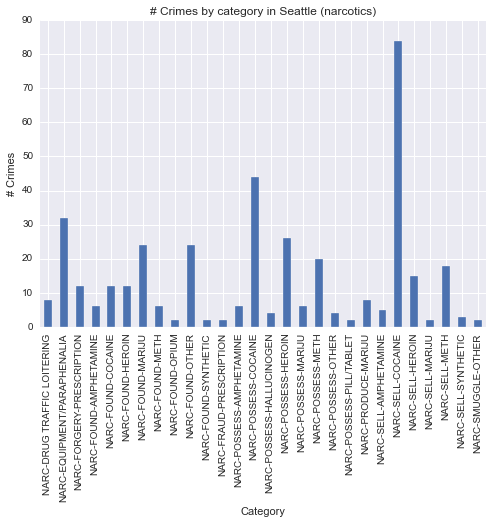

In [855]:
x2 = categ
df2 = seatle_narc['Offense Type'].value_counts().sort_index()  # 2 cols:  Category, count
xlabel('Category')
ylabel('# Crimes')
title('# Crimes by category in Seattle (narcotics)')
df2.plot(kind='bar');

In [302]:
x2 = categ
y2 = seatle_narc['Hour'].value_counts().sort_index()  # 2 cols:  Category, count
#xlabel('Hour')
#ylabel('# Crimes')
#title('# Crimes by hour in Seattle (narcotics)')
y2.plot(kind='bar');
#seatle_narc[0:1]

RuntimeError: LaTeX was not able to process the following string:
'lp'
Here is the full report generated by LaTeX: 



In [33]:
sorted(seatle['Offense Type'].unique())  # 147 categories, PREFIX-BODY-SUFFIX

['ANIMAL-BITE',
 'ANIMAL-CRUELTY',
 'ANIMAL-OTH',
 'ASSLT-AGG-BODYFORCE',
 'ASSLT-AGG-GUN',
 'ASSLT-AGG-POLICE-BODYFORCE',
 'ASSLT-AGG-POLICE-GUN',
 'ASSLT-AGG-POLICE-WEAPON',
 'ASSLT-AGG-WEAPON',
 'ASSLT-NONAGG',
 'ASSLT-NONAGG-POLICE',
 'BIAS INCIDENT',
 'BURGLARY-FORCE-NONRES',
 'BURGLARY-FORCE-RES',
 'BURGLARY-NOFORCE-NONRES',
 'BURGLARY-NOFORCE-RES',
 'BURGLARY-SECURE PARKING-NONRES',
 'BURGLARY-SECURE PARKING-RES',
 'COUNTERFEIT',
 'DISORDERLY CONDUCT',
 'DISPUTE-CIVIL PROPERTY (AUTO)',
 'DISPUTE-CIVIL PROPERTY (NON AU',
 'DISPUTE-OTH',
 'DISTURBANCE-NOISE',
 'DISTURBANCE-OTH',
 'DRIVE-BY',
 'DUI-DRUGS',
 'DUI-LIQUOR',
 'ELUDING-FELONY FLIGHT',
 'EMBEZZLE',
 'ENDANGERMENT',
 'ESCAPE',
 'FALSE REPORT',
 'FIREWORK-POSSESS',
 'FIREWORK-USE',
 'FORGERY-CHECK',
 'FORGERY-CREDIT CARD',
 'FORGERY-OTH',
 'FRAUD-CHECK',
 'FRAUD-COMPUTER',
 'FRAUD-CREDIT CARD',
 'FRAUD-IDENTITY THEFT',
 'FRAUD-OTHER',
 'FRAUD-WIRE-ELECTRONIC',
 'HARASSMENT',
 'HOMICIDE-JUST-GUN',
 'HOMICIDE-JUST-WEAPON',
 

In [724]:
#sorted(seatle['Offense Code'].unique())   # 92

In [34]:
df_narc = seatle[seatle['Offense Type'].str.contains(r'^NARC-.*$')] # $ means end of string  endstrings = ['01$', '02$', '05$']
sorted(df_narc['Offense Type'].unique())

['NARC-DRUG TRAFFIC LOITERING',
 'NARC-EQUIPMENT/PARAPHENALIA',
 'NARC-FORGERY-PRESCRIPTION',
 'NARC-FOUND-AMPHETAMINE',
 'NARC-FOUND-COCAINE',
 'NARC-FOUND-HEROIN',
 'NARC-FOUND-MARIJU',
 'NARC-FOUND-METH',
 'NARC-FOUND-OPIUM',
 'NARC-FOUND-OTHER',
 'NARC-FOUND-SYNTHETIC',
 'NARC-FRAUD-PRESCRIPTION',
 'NARC-POSSESS-AMPHETAMINE',
 'NARC-POSSESS-COCAINE',
 'NARC-POSSESS-HALLUCINOGEN',
 'NARC-POSSESS-HEROIN',
 'NARC-POSSESS-MARIJU',
 'NARC-POSSESS-METH',
 'NARC-POSSESS-OTHER',
 'NARC-POSSESS-PILL/TABLET',
 'NARC-PRODUCE-MARIJU',
 'NARC-SELL-AMPHETAMINE',
 'NARC-SELL-COCAINE',
 'NARC-SELL-HEROIN',
 'NARC-SELL-MARIJU',
 'NARC-SELL-METH',
 'NARC-SELL-SYNTHETIC',
 'NARC-SMUGGLE-OTHER']

In [253]:
mask_found   = seatle['Offense Type'].str.startswith('NARC-FOUND')    #  True or False
mask_possess = seatle['Offense Type'].str.startswith('NARC-POSSESS') 
mask_sell    = seatle['Offense Type'].str.contains('NARC-SELL') 

# mask = seatle['Offense Type'].map(lambda x: x.startswith('NARC-FOUND'))    #  fast !
# df[[x.startswith('t') for x in df['a']]]                                   #  slower !!!
# seatle[mask]
df_narc_sell    = seatle[ mask_sell ]
df_narc_possess = seatle[ mask_possess ]
df_narc_found   = seatle[ mask_found ]
sorted(df_narc_found['Offense Type'].unique())

['NARC-FOUND-AMPHETAMINE',
 'NARC-FOUND-COCAINE',
 'NARC-FOUND-HEROIN',
 'NARC-FOUND-MARIJU',
 'NARC-FOUND-METH',
 'NARC-FOUND-OPIUM',
 'NARC-FOUND-OTHER',
 'NARC-FOUND-SYNTHETIC']

In [749]:
df_narc_sell['Hour'].count()

127

In [36]:
seatle[ mask_found ][['Hour','Offense Type']].groupby(['Hour','Offense Type']).size() #.index_count()

Hour  Offense Type          
0     NARC-FOUND-COCAINE        2
      NARC-FOUND-OTHER          2
7     NARC-FOUND-METH           2
9     NARC-FOUND-MARIJU         1
10    NARC-FOUND-HEROIN         3
      NARC-FOUND-MARIJU         5
      NARC-FOUND-OTHER          2
11    NARC-FOUND-AMPHETAMINE    3
      NARC-FOUND-COCAINE        2
      NARC-FOUND-MARIJU         2
      NARC-FOUND-METH           2
      NARC-FOUND-OTHER          3
                               ..
15    NARC-FOUND-OTHER          2
16    NARC-FOUND-MARIJU         6
      NARC-FOUND-OPIUM          2
17    NARC-FOUND-OTHER          1
18    NARC-FOUND-AMPHETAMINE    2
      NARC-FOUND-OTHER          2
19    NARC-FOUND-COCAINE        2
      NARC-FOUND-SYNTHETIC      2
21    NARC-FOUND-MARIJU         1
22    NARC-FOUND-HEROIN         4
      NARC-FOUND-MARIJU         2
23    NARC-FOUND-AMPHETAMINE    1
dtype: int64

In [795]:
seatle[ mask_possess ]['Hour'].count()

112

In [781]:
seatle[ mask_found ]['Hour'].count()

88

In [256]:
# frames = [df1, df2, df3]    # cols are the same
# result = pd.concat(frames)

frames = [ df_narc_found, df_narc_possess, df_narc_sell ]
seatle_narc = pd.concat(frames)  # by rows
seatle_narc[0:1]                     # OK !!!   327 rows = 112 + 88 + 127

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,one,Day,Hour,datetime
1320,1051690,2014289754,X,74,NARC-FOUND-OTHER,X,NARCOTICS,08/30/2014 02:06:00 PM,08/30/2014 02:06:00 PM,NaN,5 AV N / HARRISON ST,D,D1,7200.1024,-122.347595,47.622073,"(47.622072692, -122.347595253)",8,2014,1,30,14,2014-08-30 00:00:00


In [767]:
df_narc_found['Hour'].count()

88

In [768]:
df_narc_sell['Hour'].count()

127

In [38]:
gb_seatle_narc = seatle_narc.groupby(['Offense Type']).size()
gb_seatle_narc

Offense Type
NARC-FOUND-AMPHETAMINE        6
NARC-FOUND-COCAINE           12
NARC-FOUND-HEROIN            12
NARC-FOUND-MARIJU            24
NARC-FOUND-METH               6
NARC-FOUND-OPIUM              2
NARC-FOUND-OTHER             24
NARC-FOUND-SYNTHETIC          2
NARC-POSSESS-AMPHETAMINE      6
NARC-POSSESS-COCAINE         44
NARC-POSSESS-HALLUCINOGEN     4
NARC-POSSESS-HEROIN          26
NARC-POSSESS-MARIJU           6
NARC-POSSESS-METH            20
NARC-POSSESS-OTHER            4
NARC-POSSESS-PILL/TABLET      2
NARC-SELL-AMPHETAMINE         5
NARC-SELL-COCAINE            84
NARC-SELL-HEROIN             15
NARC-SELL-MARIJU              2
NARC-SELL-METH               18
NARC-SELL-SYNTHETIC           3
dtype: int64

In [807]:
datetime_seatle = pd.to_datetime(seatle['Occurred Date or Date Range Start'])
gb_date_seatle = seatle.groupby('Occurred Date or Date Range Start')

In [890]:
gb_date_seatle['Offense Type'].count()[0:3]

Occurred Date or Date Range Start
06/01/2014 01:00:00 AM    4
06/01/2014 01:13:00 AM    1
06/01/2014 01:15:00 AM    2
Name: Offense Type, dtype: int64

In [897]:
#sf['datetime'][0:3]      # Name:datetime, dtype: object             0   2014-08-31 00:00:00
#datetime_sf[0:3]         # Name:Date,     dtype: datetime64[ns]     0   2014-08-31

In [268]:
#crimes_sf_date = gb_sf_date.size()   # Crimes by date, 92 days for June,July,August

In [319]:
datetime_sf = sf['datetime'] # pd.to_datetime(sf['Date'])
gb_sf = sf.groupby('datetime')

#plt.subplot(161)
#plt.rc('text', usetex=False)

#plt.xlabel('Date: Jun 1 to Aug 31, 2014')
#plt.ylabel('# Crimes')
#plt.title(u'Crimes by date in \textbf{San Francisco}')
#plt.title('Crimes by date in San Francisco')

#plt.plot_date(gb_sf['datetime'].max(), gb_sf['datetime'].size(), alpha=.75, lw=0)
#plt.plot_date(gb_sf['datetime'].max(), gb_sf['datetime'].size(), '-', lw=3)       # datetime_sf.max() is timestamp, 31 Aug 2014

In [7]:
sf_most_common_crimes_evening = sf[(sf['Hour']>=18) | (sf['Hour'] <=1)]['Category'].value_counts()

NameError: name 'sf' is not defined

In [6]:
sf_most_common_crimes_evening[0:3]

NameError: name 'sf_most_common_crimes_evening' is not defined

In [16]:
sf_most_common_crimes_evening.plot(kind='bar')

In [5]:
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) * np.sin(np.pi*t/4) + 2

#plt.rc('text', usetex=False)
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':16})

figure, ax = plt.subplots(figsize=(8,6))
plt.plot(t, s, alpha=0.25)

In [21]:
sf[0:2
  ]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,one,Year,Month,Day,Hour,datetime
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,1,2014,8,31,23,2014-08-31 00:00:00
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,1,2014,8,31,23,2014-08-31 00:00:00


In [22]:
# write DataFrameto csv
sf.to_csv('Thefts.csv', sep=',')

In [28]:
sf[['IncidntNum','PdDistrict','X','Y']][0:2]

,IncidntNum,PdDistrict,X,Y
0,140734311,BAYVIEW,-122.405647,37.738322
1,140736317,MISSION,-122.435012,37.761768


In [27]:
sf[['X','Y']][0:2]

,X,Y
0,-122.405647,37.738322
1,-122.435012,37.761768


In [47]:
sf_thefts_intensity = sf[(sf.Category == 'LARCENY/THEFT') | (sf.Category == 'VEHICLE THEFT')][['IncidntNum','PdDistrict','X','Y','Category']].sort('Category')
sf_thefts_intensity

,IncidntNum,PdDistrict,X,Y,Category
2,146177923,SOUTHERN,-122.409795,37.780036,LARCENY/THEFT
17380,146168740,PARK,-122.434086,37.773085,LARCENY/THEFT
17383,140568803,RICHMOND,-122.456325,37.779195,LARCENY/THEFT
17386,146134785,INGLESIDE,-122.420557,37.710895,LARCENY/THEFT
17387,140575143,CENTRAL,-122.408015,37.796700,LARCENY/THEFT
17402,140569271,MISSION,-122.405829,37.768475,LARCENY/THEFT
17408,146132610,SOUTHERN,-122.403405,37.775421,LARCENY/THEFT
17412,146134127,SOUTHERN,-122.394491,37.777554,LARCENY/THEFT
17379,140569889,CENTRAL,-122.407149,37.806427,LARCENY/THEFT
17414,146139086,PARK,-122.463169,37.765114,LARCENY/THEFT


In [49]:
sf_thefts.to_csv('Thefts_intensity.csv', sep=',')

In [50]:
sf_thefts = sf[(sf.Category == 'LARCENY/THEFT') | (sf.Category == 'VEHICLE THEFT')].sort('Category')
sf_thefts.to_csv('Thefts.csv', sep=',')